In [5]:
import gurobipy as gp
from gurobipy import GRB
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import scipy.sparse as sp
import os

from functions import plot_DA_week
from functions import load_da_market_data

DATA LOADING


In [9]:

# 1) Day-Ahead market prices
da_folder = "data/energy-charts_day_ahead"
years_to_load = [2024] # Define the years you want to import
merged_DA = load_da_market_data(da_folder, years_to_load)

print(merged_DA.head())
print(merged_DA.tail())
print(len(merged_DA))


                  timestamp  price_eur_mwh
0 2023-12-31 23:00:00+00:00          25.97
1 2024-01-01 00:00:00+00:00          21.99
2 2024-01-01 01:00:00+00:00          14.32
3 2024-01-01 02:00:00+00:00          11.37
4 2024-01-01 03:00:00+00:00          11.35
                     timestamp  price_eur_mwh
8779 2024-12-31 18:00:00+00:00         125.02
8780 2024-12-31 19:00:00+00:00         114.76
8781 2024-12-31 20:00:00+00:00         110.09
8782 2024-12-31 21:00:00+00:00         113.60
8783 2024-12-31 22:00:00+00:00         106.00
8784


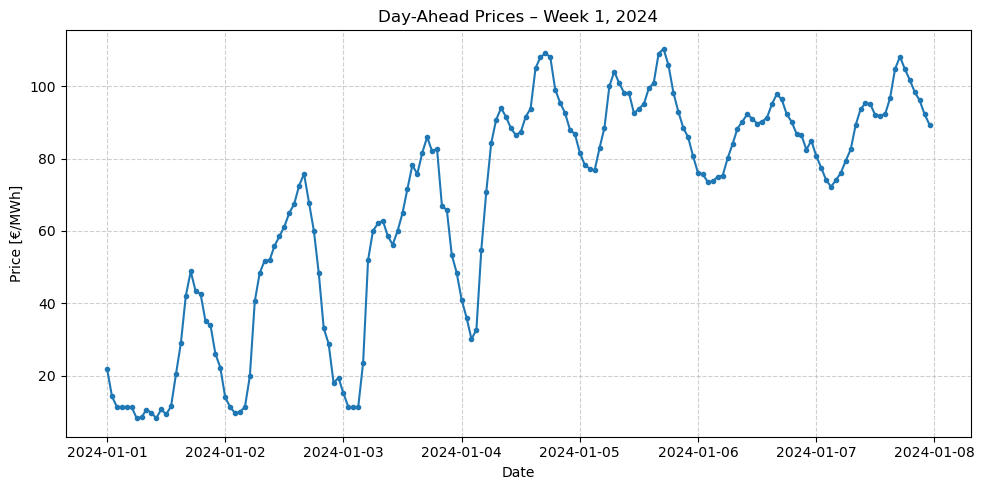

In [7]:
plot_DA_week(merged_DA, year=2024, week=1)